<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Project Outline

</div>

The goal of my project is to construct a robust customer segmentation model to inform/enhance the marketing strategy for a clientele of approximately 9000 active credit card holders. The data set I'm using encompasses the usage patterns of these customers over the preceding 6 months, presenting a comprehensive view of their behaviors. I will be using a combination of K-Means Clustering and a neural network using autoencoders to draw up my conclusions for this project. First I will determine the best number of clusters to use for K-means clustering using the Silhoutte Score and the Elbow method. Then I will construct the clusters off of that. Then I will build a neural network and apply autoencoders to tune the cluster to be more precise and then compare my final results.

![Alt text](images/creditCardPhoto.jpg)

Citation: Arjun Bhasin. (2017). Credit Card Dataset For Clustering. Version 1. Retrieved November 10th, 2023 from 
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
# Stores the csv into the data frame.
dataFrame = pd.read_csv("./sampleData/CC GENERAL.csv")

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Data Inspection 

</div>

Below are the columns in this dataset and what they mean. There are a total of 17 Numerical and 1 Categorical variables. The data is tabular data from 1 data source that was uploaded to kaggle.
- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

Overall, this dataset has a total of 18 columns and 8950 unique rows.

In [3]:
# Retrieves info and the first 10 rows on the data frame.
dataFrame.info()
dataFrame.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
dataFrame.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Data Cleaning

</div>

## Overview
- Replaced missing values with the mean value of that column.
- Verfied no duplicated rows existed in the dataset.
- Removed unneeded columns that didn't provide value to the clustering.

From the above table, we can see that two columns the 'CREDIT_LIMIT' and the 'MINIMUM_PAYMENTS' columns are the only two in the data set to contain null values. 'MINIMUM_PAYMENTS' contains 313 null values and 'CREDIT_LIMIT' contains 1 null value. Since we don't want any null values to sway our data, below I fill every null value with a new value. That new value I chose was the mean of the dataset for that column.

In [5]:
# Replaces the missing values with that of the mean of that column
dataFrame['CREDIT_LIMIT'] = dataFrame['CREDIT_LIMIT'].fillna(dataFrame['CREDIT_LIMIT'].mean())
dataFrame['MINIMUM_PAYMENTS'] = dataFrame['MINIMUM_PAYMENTS'].fillna(dataFrame['MINIMUM_PAYMENTS'].mean())

# Displays the new table showing all na's removed
dataFrame.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Next I verified that no duplicated values exist in the dataset after removing the nulls.

In [6]:
# Verfies if any duplicated rows exist inside the data
duplicatedEntries = dataFrame.duplicated().sum()
print(f"Number of Duplicated Entries: {duplicatedEntries}")

Number of Duplicated Entries: 0


Since the customer id is going to be a unique value inside the dataset per customer, it provides no value to me in terms of clustering. So I go ahead and drop that value here while I'm cleaning the data.

In [7]:
# This is just a unique id per customer that wont assist us in the clustering process
dataFrame.drop(['CUST_ID'], axis = 1, inplace = True)
dataFrame

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Exploratiry Data Analysis (EDA)

</div>

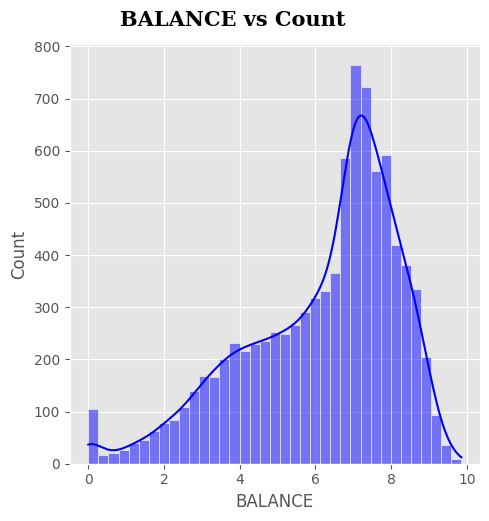

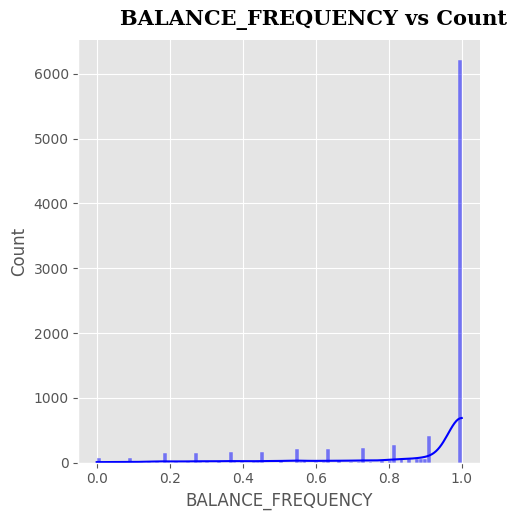

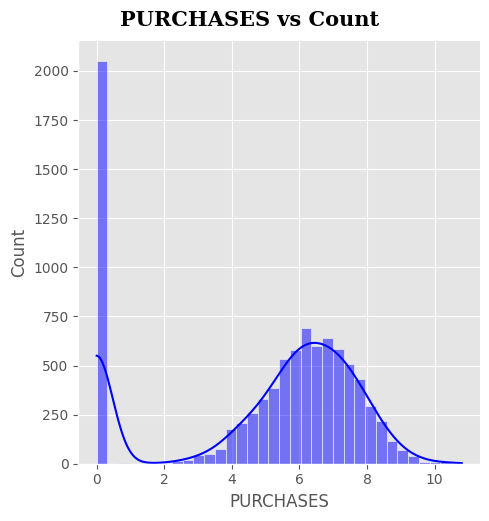

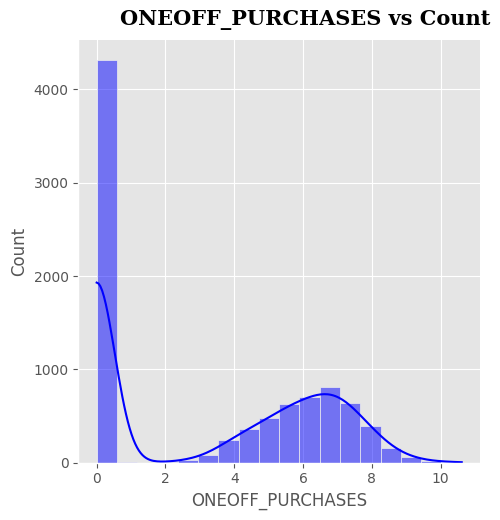

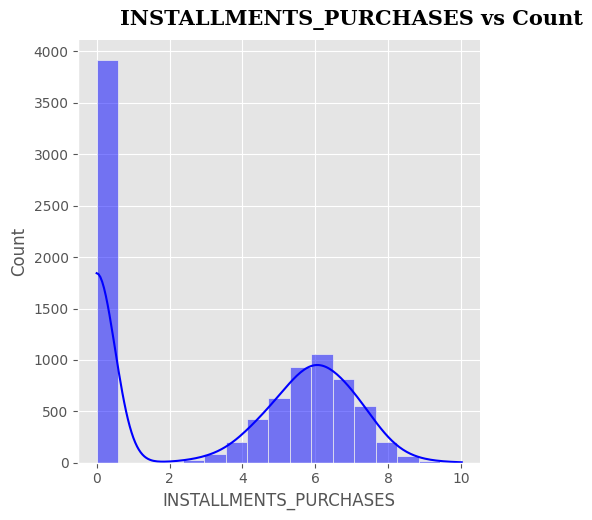

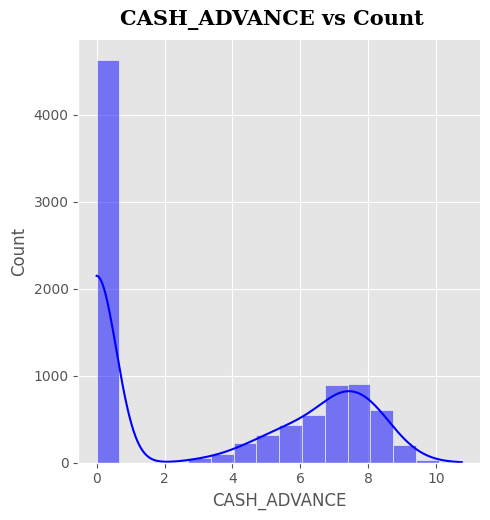

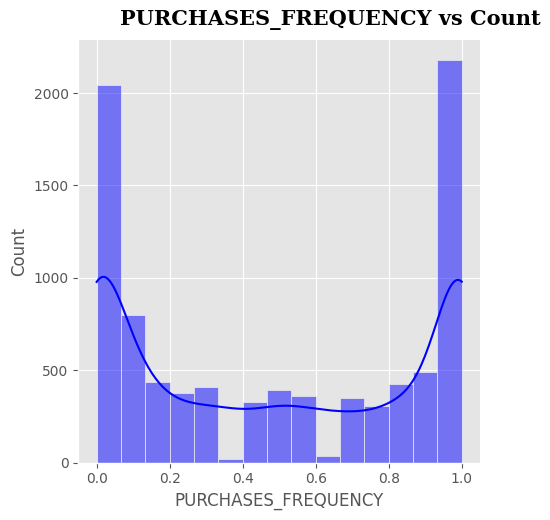

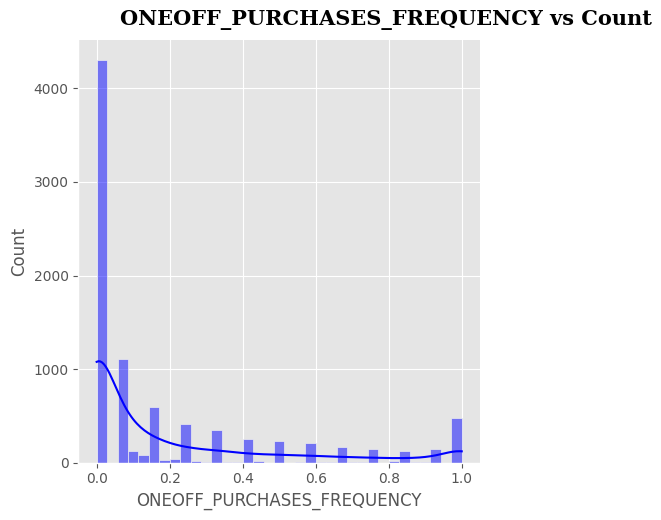

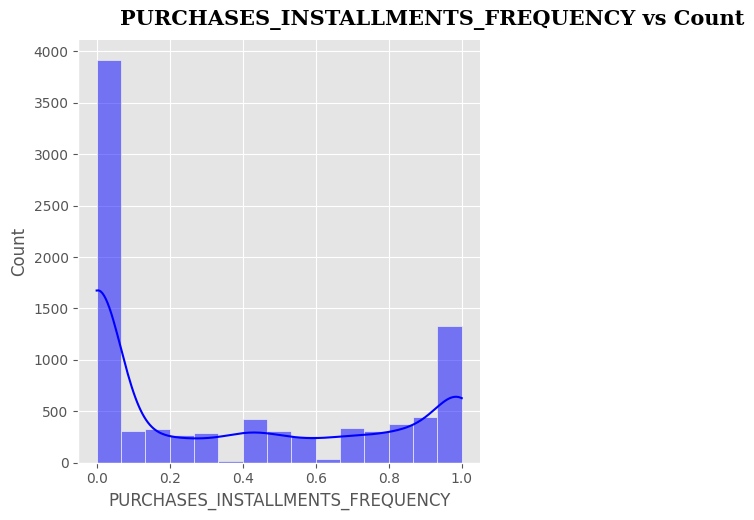

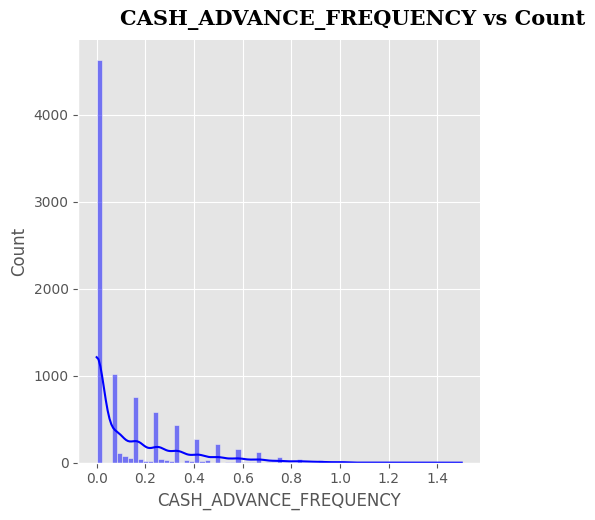

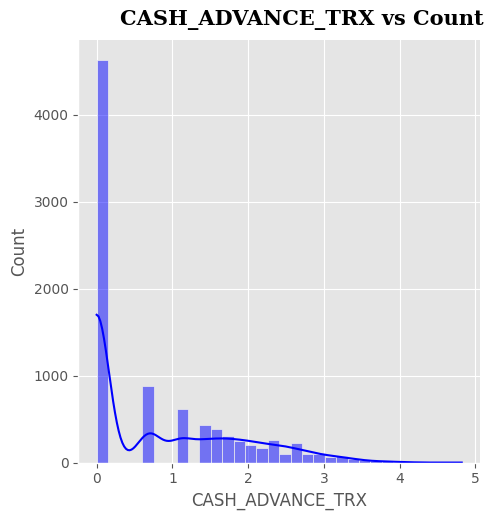

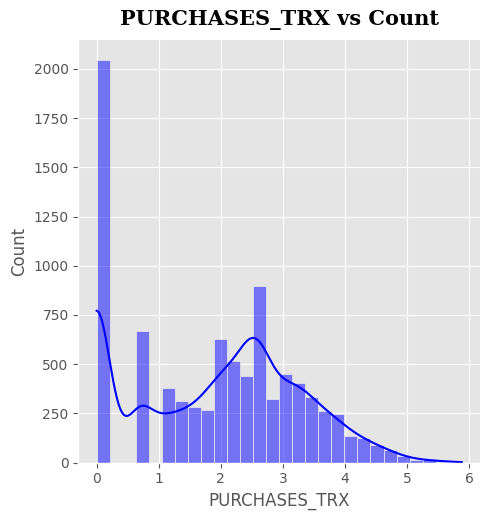

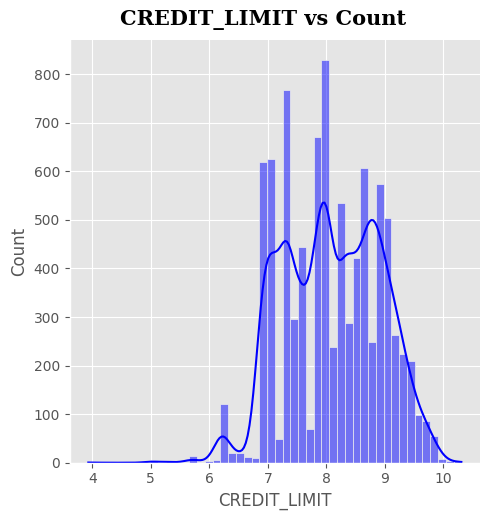

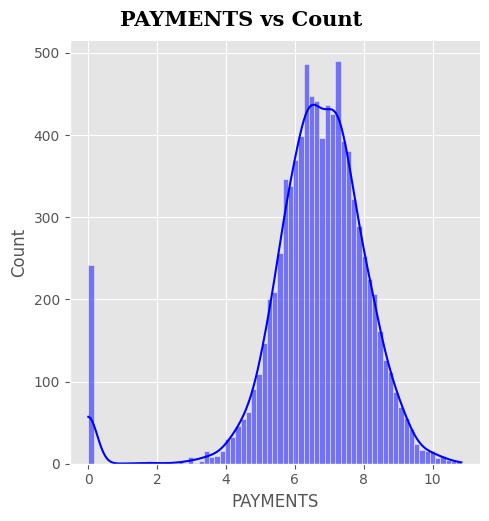

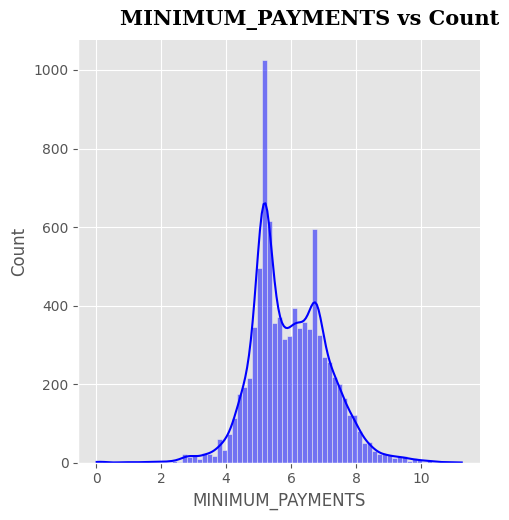

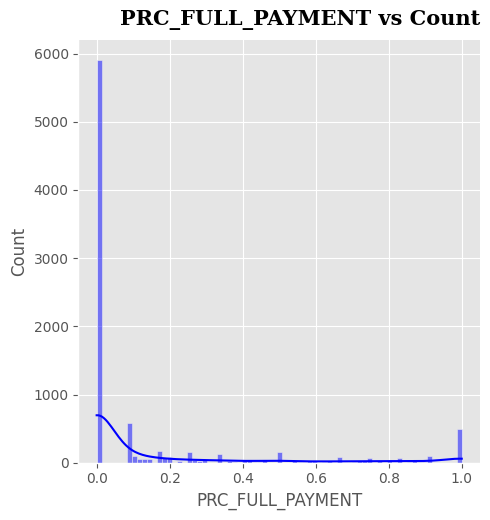

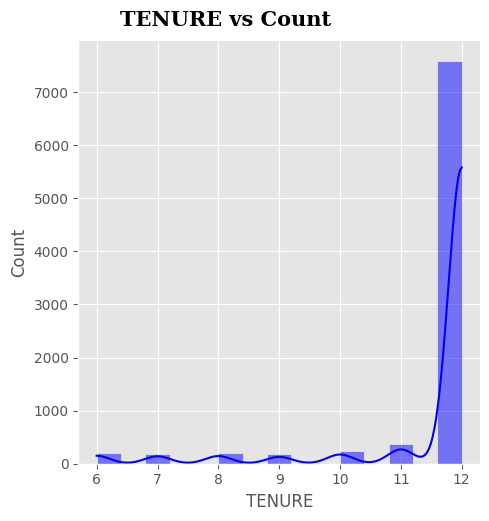

In [35]:
# Below is a list of all numerical features inside of the dataset
numericalFeatures = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Creates a distribution plot using Seaborn and then setsup chart characteristics.
def generateDistributionPlot(feature, graphColor):
    sns.displot(x = feature, data = dataFrame, kde = True, color = graphColor)
    plt.figtext(0.25, 1, '%s vs Count'%feature, fontfamily = 'serif', fontsize = 15, fontweight = 'bold')

# looking at the distribution of data
for feat in numericalFeatures:
    generateDistributionPlot(feat, "blue")

## Graph Summary
As you can see from looking at the above graphs, the customers in the dataset are very diverse in where they fall. Some customers sit at the very high end and others at the bottom. My goal is to handle this diverse data and limit the influence of outliers on my final conclusion. Below you will find just some points I've gathered from the above graphs.

- Balance vs Count: A customers average balance left in their account is around 1500.
- Balance Frequency vs Count: The majority of balances are frequently updated.
- Purchases vs Count: Most customers have purchased under 5000 items from their account.
- Purchases Frequency vs Count: There is an even mix of customers who purchase things frequently and not freqently.
- Purchase Installments vs Count: There is about a 2.6 to 1 ratio of not using installments to using them.
- Chash Advance Frequency vs Count: More often cash isnt being paid in advance.
- Credit Limit vs Count: The credit limit average is around 4000.
- Tenure vs Count: Most customers have about 11-12 years of tenure of credit card service.

## Removing Outliers Influence
In order to address these concerns about the data being influenced by outliers, below I have applied a log transformation onto the features that appeared to need it. This can help compress the data range and pull in the higher values and spread out the lower values.

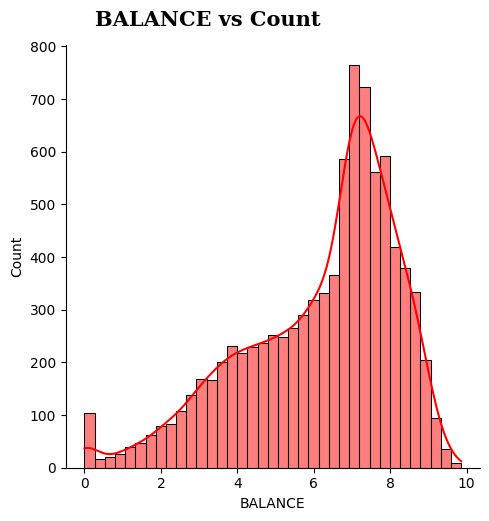

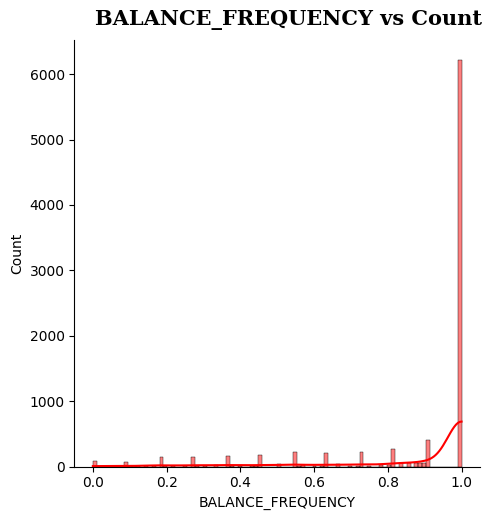

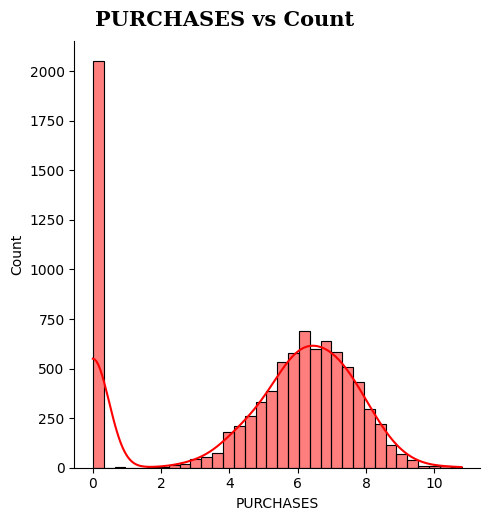

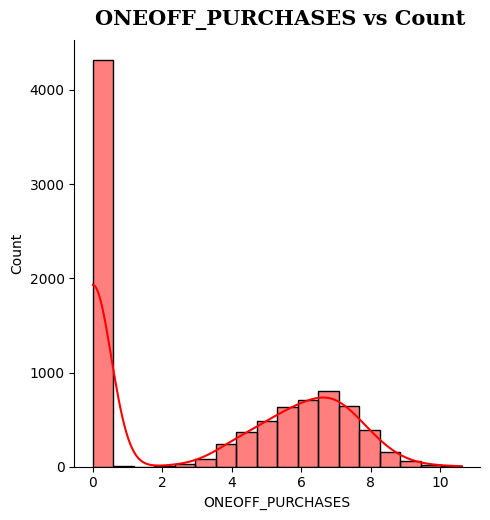

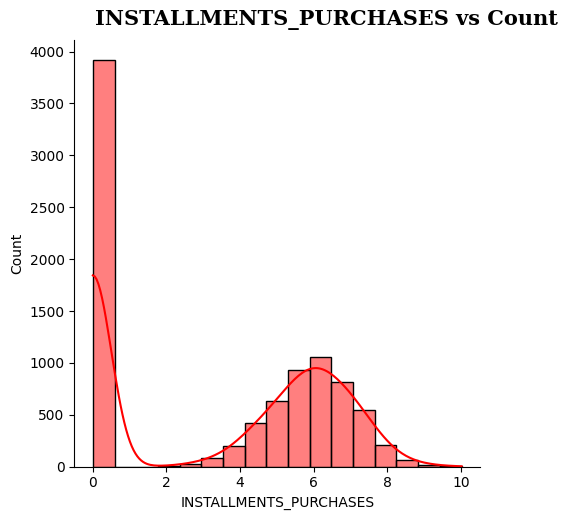

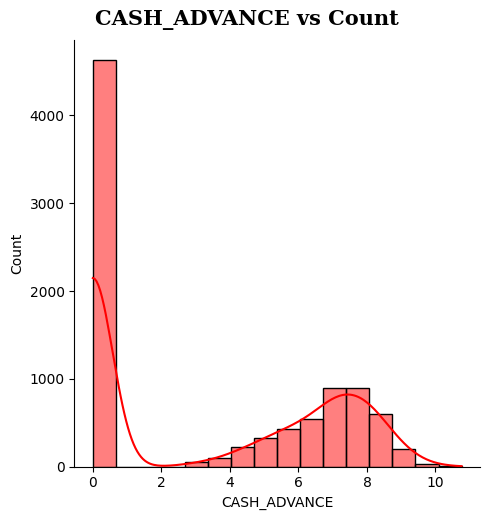

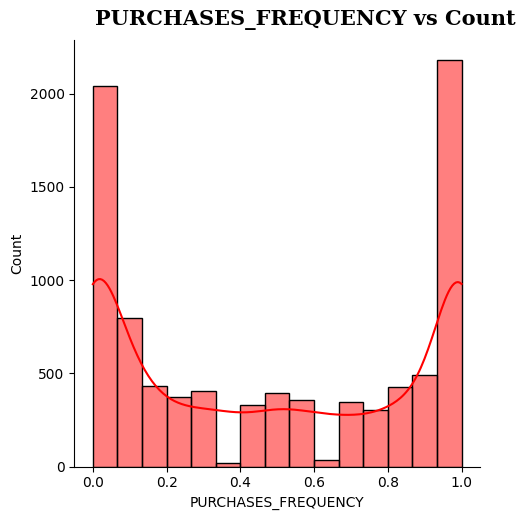

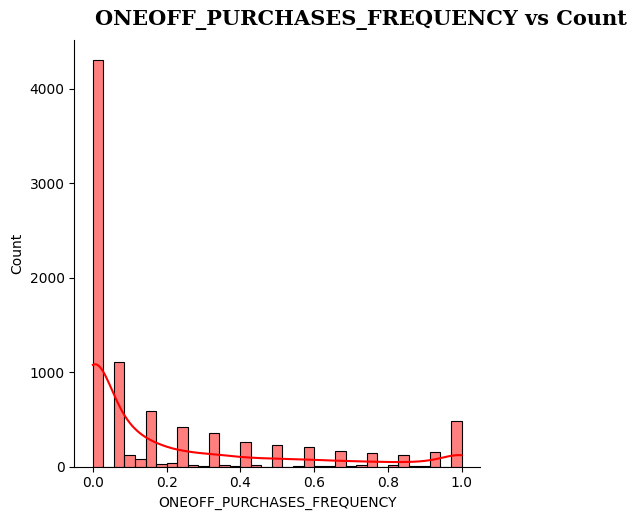

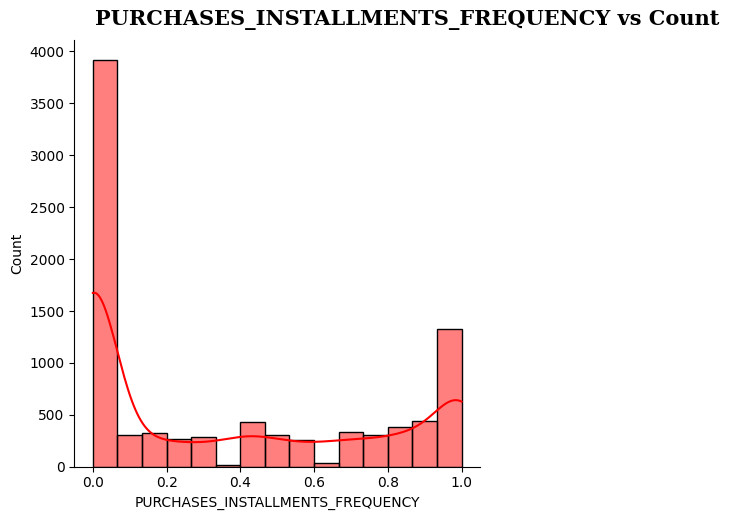

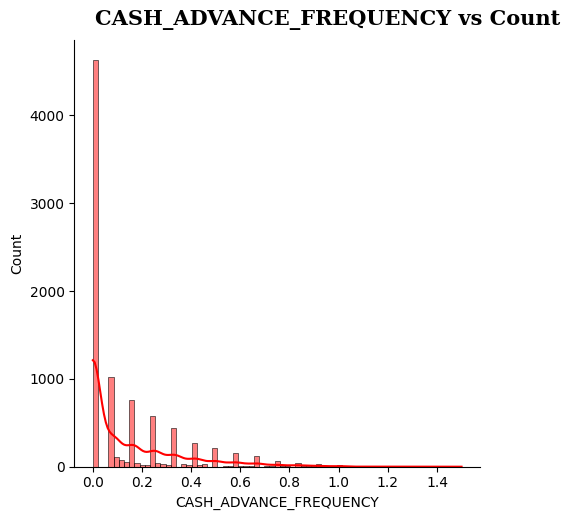

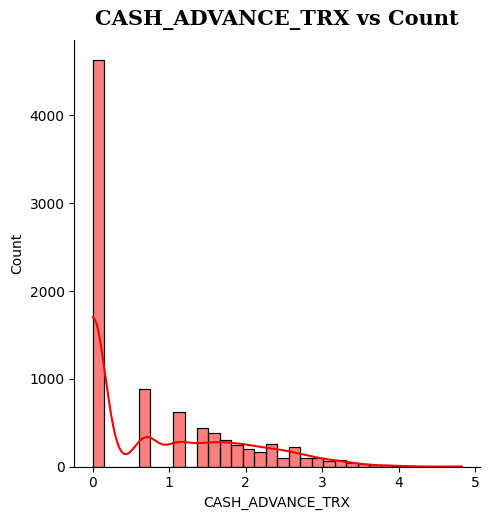

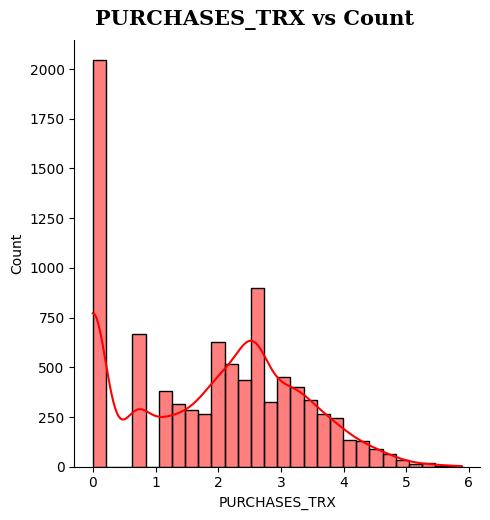

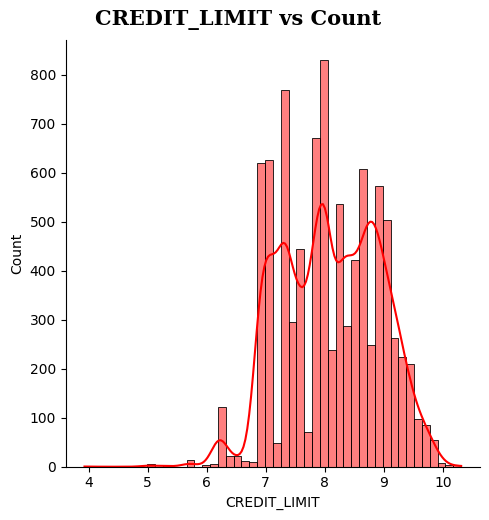

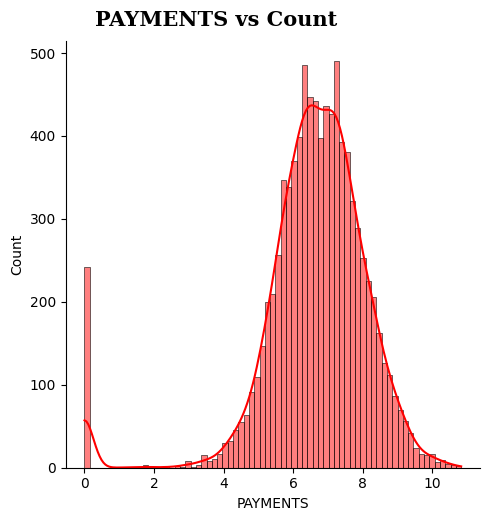

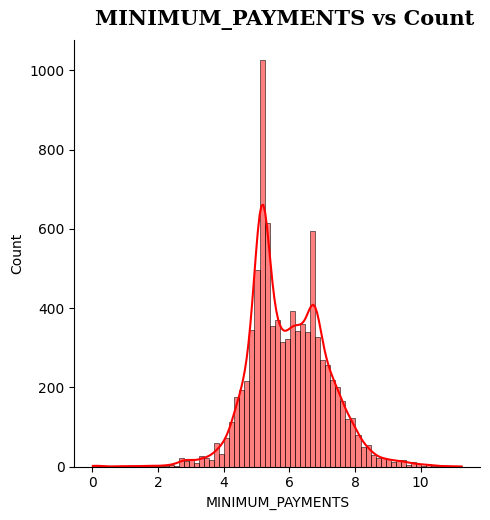

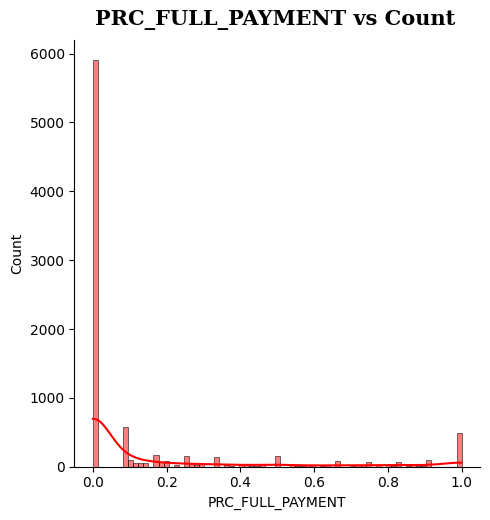

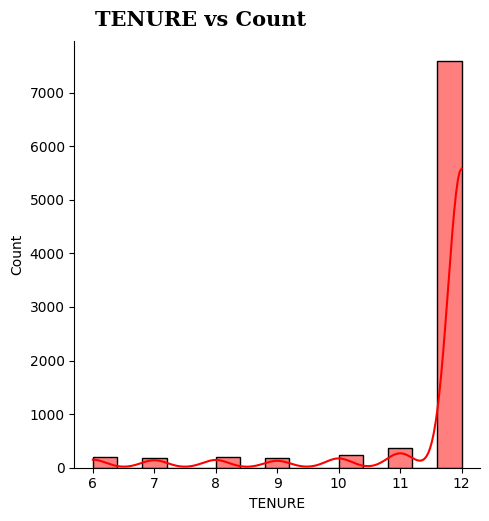

In [9]:
dataFrame = dataFrame.copy()

# These features are the ones I've idetified to be the most skewed by outliers.
deviatedFeatures = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS']

# Applying a log transformation to remove the negative effects of outliers on the dataset.
for feat in deviatedFeatures:
    dataFrame[feat] = np.log(1 + dataFrame[feat])

for feat in numericalFeatures:
    generateDistributionPlot(feat, "red")

## Graph Summary #2
The new graphs are now less influenced by outliers. You can tell by looking at the distribution on each of them and comparing them to the original graph above. The data is now a lot tighter and more tightly coupled.

## Correlation Matrix
- Balance is highly correlated with minimum payments
- Purchases is highly correlated with one off purchases, installment purchases, purchases frequency, and purchases trx
- One off purchases is highly correlated to one off purchase frequency
- Installment purchases is highly correlated with installment purchases frequency, purchases, purchases trx and purchases frequency
- Cash advance is highly correlated to cash advance frequency and cash advance trx


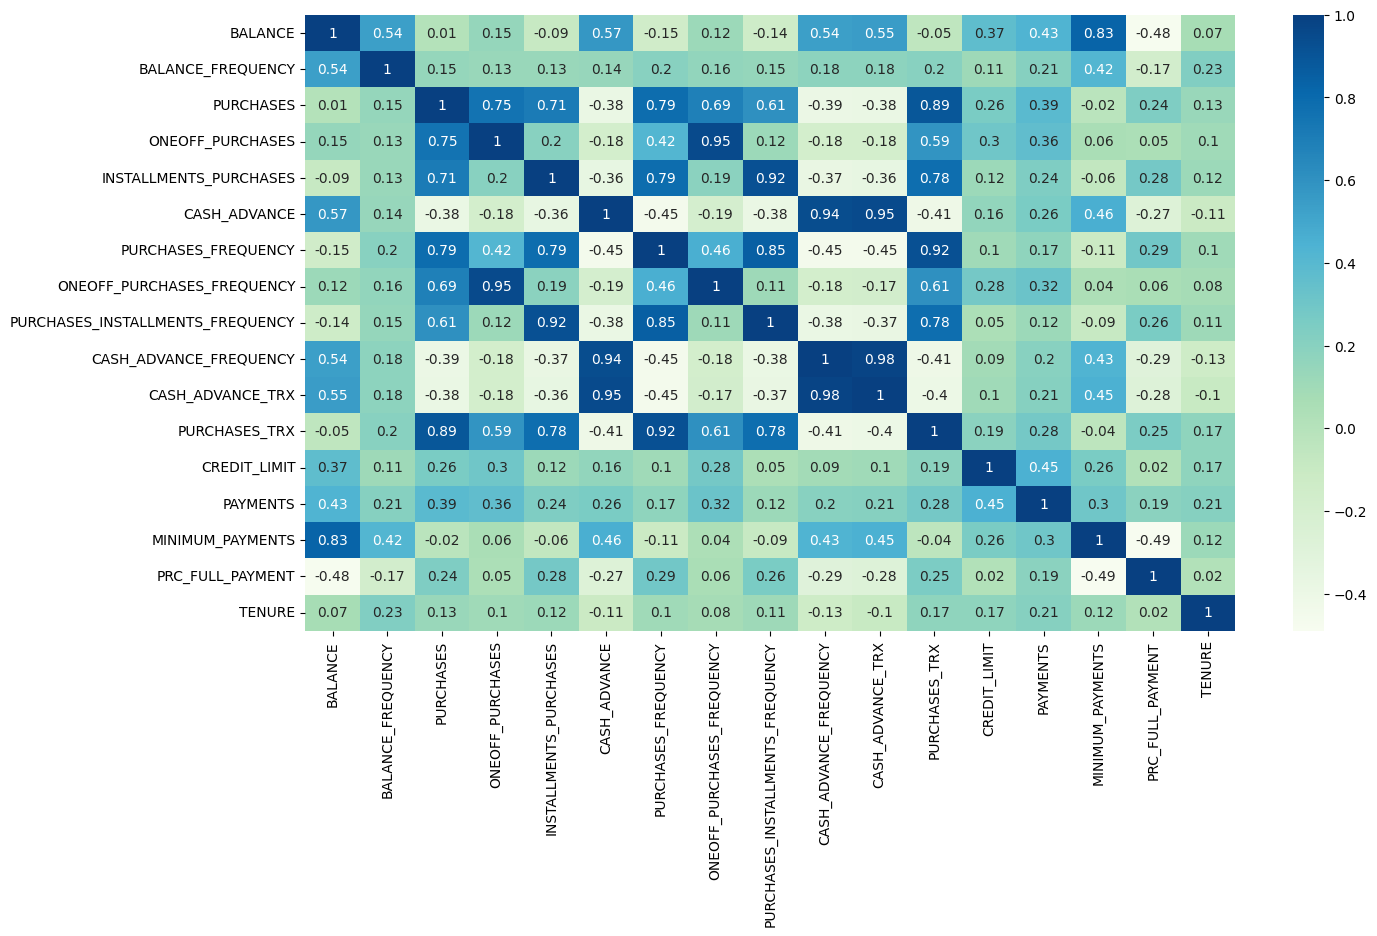

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(dataFrame[numericalFeatures].corr(method = 'spearman'), 2), 
            annot = True, mask = None, cmap = 'GnBu')
plt.show()

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# K-Means Clustering Model

</div>

In [11]:
# Standardizes the features in the data frame
standardScaledInstance = StandardScaler()
trainDataSet = standardScaledInstance.fit_transform(dataFrame)
trainDataSet.shape

(8950, 17)

Next, I perform k-means clusting on the standardized dataset in the range of values of 1 - 20. Then plot the data.

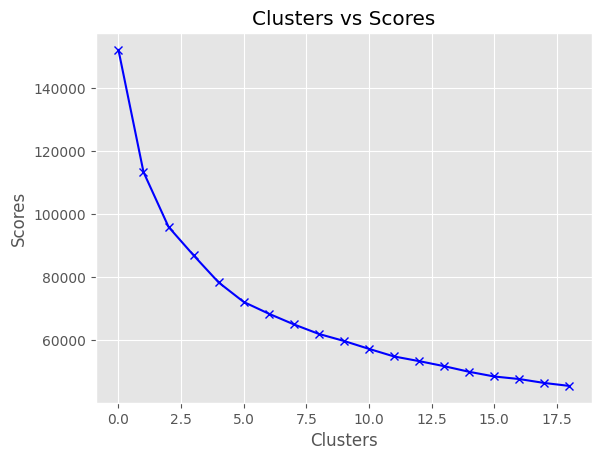

In [43]:
kMeansPrimaryScores = []
dataRange = range(1,20)

for i in dataRange:
    # Applies k means clustering to the data
    kMeansModel = KMeans(n_clusters = i, n_init = 10)
    kMeansModel.fit(trainDataSet)
    kMeansPrimaryScores.append(kMeansModel.inertia_)

# Graphs the data into an elbow plot
plt.title('Clusters vs Scores')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.plot(kMeansPrimaryScores, 'bx-')
plt.style.use('ggplot')
plt.show()

This graph aims to help determine the optimal number of clusters that I want to use in my KNN model. Looking at this, you can see that the elbow of the curve starts around cluster number 5 here. It doesn't appear to linearly decrease though until cluster number 8. So in this case, the 8th cluster looks to be the most optimal number to go with based off the Silhoutte Score and the Elbow method above.

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# K-Means With Identified Cluster From Elbow Method

</div>

In [51]:
# Selected 8 based on the above findings as 8 is the optimal cluster.
kMeansModel = KMeans(8, n_init = 10)
kMeansModel.fit(trainDataSet)
labels = kMeansModel.labels_
kMeansModel.cluster_centers_.shape

(8, 17)

In [14]:
# Retrieves the center of each cluster
centerClusters = pd.DataFrame(data = kMeansModel.cluster_centers_,columns = [dataFrame.columns])
centerClusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.187658,0.411758,1.010454,1.287096,0.779079,-0.713824,1.096055,1.772274,0.677239,-0.596091,-0.682712,1.264409,0.735329,0.676593,-0.096061,0.575762,0.272840
1,-1.787207,-2.352639,-0.152768,-0.267199,-0.273887,-0.640560,-0.593722,-0.451735,-0.472410,-0.586201,-0.642859,-0.463932,-0.238335,-0.986958,-0.894954,0.066932,0.084932
2,0.592611,0.269314,-1.472913,-0.840749,-1.043536,1.010243,-1.181749,-0.643111,-0.905613,0.730959,0.907410,-1.287716,-0.035987,0.123589,0.402946,-0.421278,0.230903
3,0.161108,0.413708,0.475143,-0.372508,0.890104,-0.555291,0.759675,-0.450734,0.980213,-0.536474,-0.569413,0.583903,-0.475577,-0.093283,0.251056,-0.433752,0.253399
4,0.151119,0.267801,0.362338,0.762884,-0.687576,-0.535171,-0.416365,0.255181,-0.786959,-0.513015,-0.554687,-0.120619,-0.155876,-0.220205,-0.056347,-0.358809,0.209943
5,-1.175226,-0.092174,0.442062,-0.657742,0.891735,-0.900861,0.847951,-0.562620,1.021780,-0.663710,-0.793402,0.475891,-0.264701,-0.228690,-0.933857,1.540225,-0.233835
6,0.887080,0.428800,0.653338,0.656389,0.467328,1.213000,0.487434,0.408652,0.332080,1.292755,1.384871,0.662997,0.594143,0.647320,0.897102,-0.390669,0.152362
7,0.070355,-0.366249,-0.728519,-0.364116,-0.732970,0.845376,-0.663659,-0.333333,-0.627324,0.830840,0.651851,-0.794241,-0.574288,-0.735651,-0.347129,-0.308744,-3.266968


In [15]:
# Retrieves the cetner of the clusters of the original data set unstandardized
centerClusters = standardScaledInstance.inverse_transform(centerClusters)
centerClusters = pd.DataFrame(data = centerClusters, columns = [dataFrame.columns])
centerClusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.539429,0.974812,7.846847,7.382425,5.754147,0.773518,0.930250,0.731161,0.633590,0.015860,0.128536,3.631750,8.697538,7.701456,5.838287,0.322115,11.882448
1,2.563650,0.319952,4.454067,2.336896,2.508064,1.034785,0.252061,0.067696,0.176689,0.017839,0.168758,1.257390,7.899533,5.053625,4.895930,0.173291,11.630979
2,7.354676,0.941069,0.603587,0.475048,0.135390,6.921714,0.016058,0.010605,0.004523,0.281416,1.733383,0.125693,8.065375,6.821253,6.426905,0.030498,11.826326
3,6.485979,0.975274,6.285500,1.995046,6.096417,1.338863,0.795245,0.067995,0.753999,0.027790,0.242885,2.696885,7.705092,6.476063,6.247739,0.026850,11.856432
4,6.465869,0.940710,5.956482,5.680736,1.232743,1.410613,0.323243,0.278583,0.051680,0.032485,0.257747,1.729027,7.967116,6.274046,5.885133,0.048769,11.798276
5,3.795683,0.855436,6.189013,1.069123,6.101445,0.106526,0.830674,0.034617,0.770519,0.002329,0.016821,2.548499,7.877924,6.260541,4.850041,0.604204,11.204387
6,7.947498,0.978850,6.805245,5.335033,4.793084,7.644763,0.685981,0.324367,0.496414,0.393838,2.215265,2.805543,8.581823,7.654863,7.009801,0.039451,11.721218
7,6.303276,0.790510,2.774769,2.022288,1.092801,6.333781,0.223992,0.103018,0.115123,0.301404,1.475457,0.803618,7.624190,5.453623,5.542133,0.063412,7.145278


In [52]:
print(f"Labels Max: {labels.max()}")
print(f"Labels Min: {labels.min()}")
print(f"Labels Shape: {labels.shape}")

kMeansPredictor = kMeansModel.fit_predict(trainDataSet)
print(f"K Means Predictor: {kMeansPredictor}")

Labels Max: 7
Labels Min: 0
Labels Shape: (8950,)
K Means Predictor: [7 4 6 ... 0 0 0]


In [17]:
# Adds the labels onto each cluster in the data frame
creditCardCluster = pd.concat([dataFrame, pd.DataFrame({'cluster': labels})], axis = 1)
creditCardCluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,1
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12,2
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,0
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12,4
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,4
5,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,12,3
6,6.442955,1.000000,8.866724,8.764620,6.535793,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.174387,9.510519,8.757047,5.293636,1.000000,12,0
7,7.509145,1.000000,6.080391,0.000000,6.080391,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.564949,7.741099,6.522189,6.278585,0.000000,12,3
8,6.923556,1.000000,6.759824,6.496005,5.303305,0.000000,0.333333,0.083333,0.250000,0.000000,0.000000,1.791759,8.853808,6.535645,5.746086,0.000000,12,4
9,5.031914,0.545455,7.156645,7.156645,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,1.386294,9.305741,7.061138,4.618109,0.000000,12,4


<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Principal Component Analysis

</div>

Goal here is to apply PCA for dimensionality reduction. It allows me to transform the data into a principal component space to reduce its high dimensionality.

In [18]:
# Creates a new instaces of PCA to retrieve the principal components.
pcaModel = PCA(n_components = 2)
pcaTransform = pcaModel.fit_transform(trainDataSet)
pcaDataFrame = pd.DataFrame(data = pcaTransform, columns = ['Analysis #1', 'Analysis #2'])
pcaDataFrame.sample(5)

,Analysis #1,Analysis #2
1397,-3.336945,0.103134
6748,-0.256752,-3.607077
1241,3.513498,0.999804
5875,3.324660,-3.332122
7950,2.500667,-1.588910


In [19]:
# Joins the cluster labels back onto the data frame again.
pcaDataFrame = pd.concat([pcaDataFrame,pd.DataFrame({'cluster': labels})], axis = 1)
pcaDataFrame.head(10)

,Analysis #1,Analysis #2,cluster
0,-0.311022,-2.694134,1
1,-3.417320,1.034282,2
2,1.551226,1.309723,0
3,-1.371171,-0.842857,4
4,-1.168321,-1.348896,4
5,1.113120,0.310888,3
6,4.799997,1.643986,0
7,1.707789,-0.050189,3
8,0.925263,0.104737,4
9,0.262593,-1.168883,4


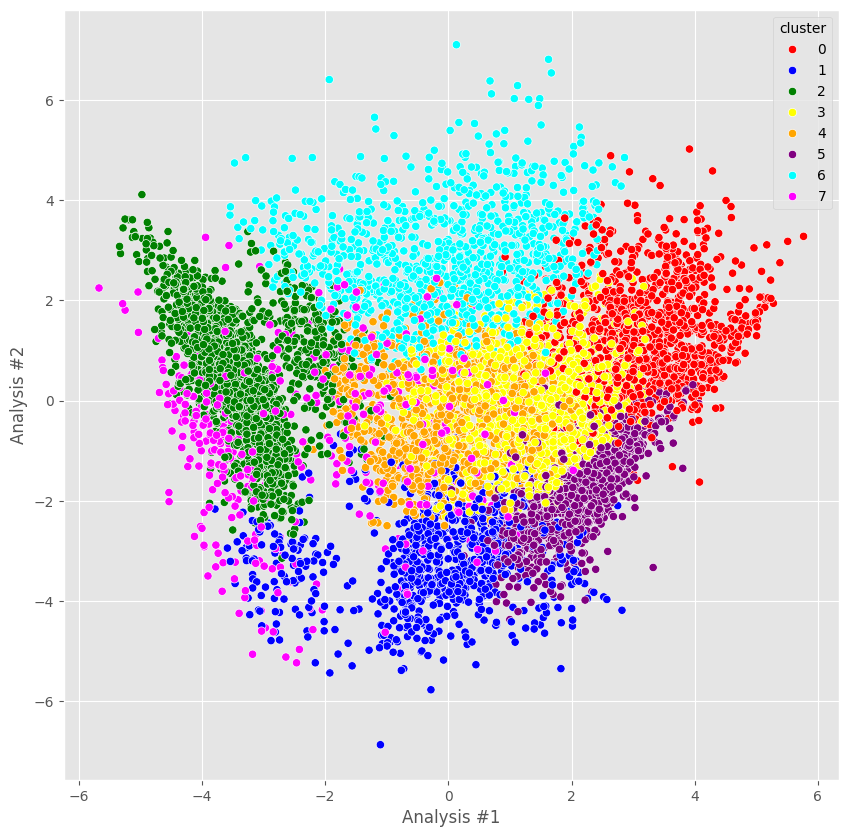

In [20]:
plt.figure(figsize = (10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x = "Analysis #1", y = "Analysis #2", hue = "cluster", data = pcaDataFrame, palette = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta'])
plt.show()


<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Autoencoder Neural Network Tuning

</div>

In [21]:
# There are 17 features we will be inputting into this.
input = Input(shape = (17,))

# These are the layers of the encoder.
x = Dense(7, activation='relu')(input)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

# Compressed repsentation of the input data.
encodeLayer = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

# These are the layers of the decoders.
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encodeLayer)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

# Recreates the output layer with 17 features
decodeLayer = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# Maps the model to the autoencoder
autoencoder = Model(input, decodeLayer)
encoder = Model(input, encodeLayer)

# Uses the Adam optimizer and mean squared error as the loss
autoencoder.compile(optimizer= 'adam', loss = 'mean_squared_error')

print(f"Shape of trainDataSet: {trainDataSet.shape}")

# Trains the autoencoder of the train dataset
autoencoder.fit(trainDataSet, trainDataSet, batch_size = 128, epochs = 25, verbose = 1)



Shape of trainDataSet: (8950, 17)
Epoch 1/25

70/70 [==============================] - 1s 9ms/step - loss: 0.5820
Epoch 2/25
70/70 [==============================] - 1s 9ms/step - loss: 0.3174
Epoch 3/25
70/70 [==============================] - 1s 9ms/step - loss: 0.2299
Epoch 4/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1950
Epoch 5/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1776
Epoch 6/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1637
Epoch 7/25
70/70 [==============================] - 1s 10ms/step - loss: 0.1543
Epoch 8/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1463
Epoch 9/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1372
Epoch 10/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1294
Epoch 11/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1255
Epoch 12/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1229
Epoch 13/25

In [22]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [23]:
encoderPrediction = encoder.predict(trainDataSet)
print(f"Shape: {encoderPrediction.shape}")

280/280 [==============================] - 0s 886us/step
Shape: (8950, 10)


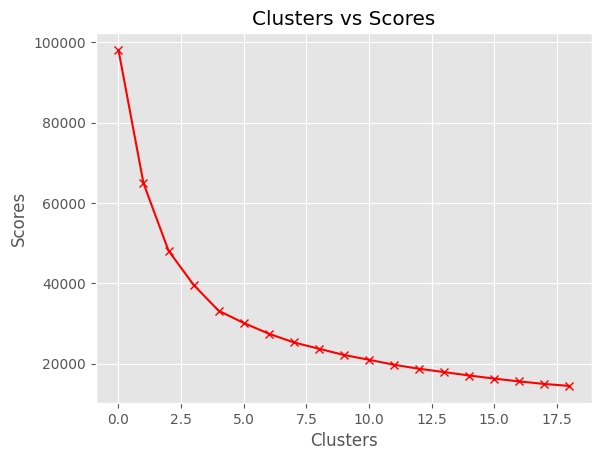

In [44]:
kMeansSecondaryScores = []

range_values = range(1, 20)
for i in range_values:
    kMeansModel = KMeans(n_clusters = i, n_init = 10)
    kMeansModel.fit(encoderPrediction)
    kMeansSecondaryScores.append(kMeansModel.inertia_)
plt.plot(kMeansSecondaryScores, 'rx-')
plt.title('Clusters vs Scores')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.style.use('ggplot')
plt.show()

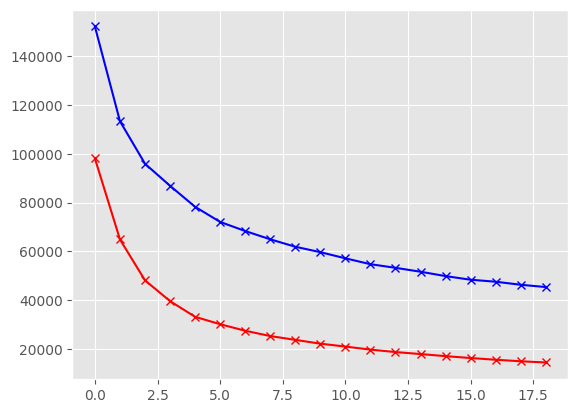

In [45]:
# Compares the two plots with and without the use of auto encoders.
plt.plot(kMeansPrimaryScores, 'bx-', label = 'Without Autoencode')
plt.plot(kMeansSecondaryScores, 'rx-', label = 'With Autoencode')

In the new autoencoder plot above in red, you can see that the optimal cluster starts to become linear in this case around 4.

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# K-Means With Autoencoder Tuned

</div>

In [50]:
kMeansModel = KMeans(4, n_init = 10)
kMeansModel.fit(encoderPrediction)
labels = kMeansModel.labels_
kMeansPredictor = kMeansModel.fit_predict(trainDataSet)
print(f"Kmeans Cluster Shape: {kMeansModel.cluster_centers_.shape}")


Kmeans Cluster Shape: (4, 17)


In [27]:
enhancedCreditCardCluster = pd.concat([dataFrame, pd.DataFrame({'cluster': labels})], axis = 1)
enhancedCreditCardCluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,2
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12,1
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,2
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12,1
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,2
5,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,12,3
6,6.442955,1.000000,8.866724,8.764620,6.535793,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.174387,9.510519,8.757047,5.293636,1.000000,12,3
7,7.509145,1.000000,6.080391,0.000000,6.080391,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.564949,7.741099,6.522189,6.278585,0.000000,12,3
8,6.923556,1.000000,6.759824,6.496005,5.303305,0.000000,0.333333,0.083333,0.250000,0.000000,0.000000,1.791759,8.853808,6.535645,5.746086,0.000000,12,2
9,5.031914,0.545455,7.156645,7.156645,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,1.386294,9.305741,7.061138,4.618109,0.000000,12,2


In [28]:
# Last Principal Component Analysis Needed here.
pcaModel = PCA(n_components = 2)
pcaTransform_new = pcaModel.fit_transform(encoderPrediction)
pcaDataFrame = pd.DataFrame(data = pcaTransform_new, columns = ['Analysis #1', 'Analysis #2'])
pcaDataFrame.sample(10)

,Analysis #1,Analysis #2
2389,-0.095265,2.768502
3654,-1.459295,1.608242
6958,-0.700801,1.751621
2608,3.435261,2.632980
788,1.241459,3.491614
220,-1.476237,-2.005714
8271,2.815371,-0.073194
347,-1.459751,-1.380715
5514,-1.922646,-0.983434
2472,-2.393412,-0.826406


In [29]:
# Applies the cluster labels back onto the data frame.
pcaDataFrame = pd.concat([pcaDataFrame, pd.DataFrame({'cluster': labels})], axis = 1)
pcaDataFrame.head(10)

,Analysis #1,Analysis #2,cluster
0,-0.607184,-0.161892,2
1,-0.748724,2.276479,1
2,-3.758237,0.076534,2
3,-1.159088,1.479950,1
4,-2.416904,0.509190,2
5,-0.281520,-1.452745,3
6,-0.702066,-2.465692,3
7,0.508056,-1.927112,3
8,-2.396208,-0.664696,2
9,-2.184402,0.262813,2


<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Results

</div>

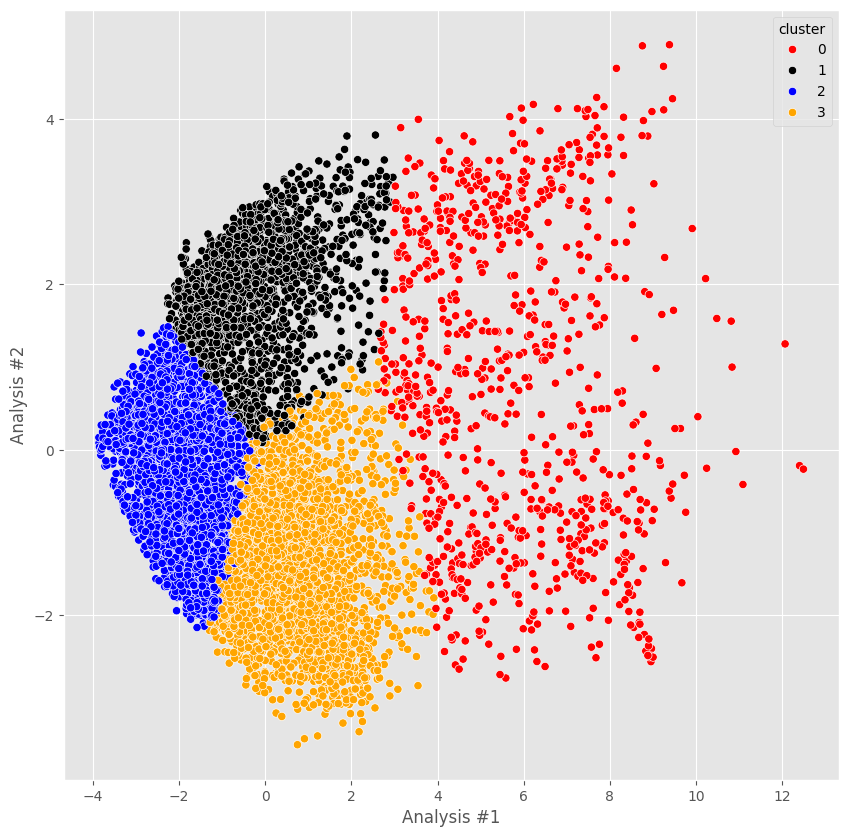

In [49]:
plt.figure(figsize = (10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x = "Analysis #1", y = "Analysis #2", hue = "cluster", data = pcaDataFrame, palette =['red','black','blue','orange'])
plt.show()

From the clustering above, you can tell I was able to identify 4 distinct customers that can be targeted from this dataset. Below I will explain the differences in each cluster using the graph above and the table below.

### Cluster 0 (Red)
- These are the newer customers who haven't been with the credit card for as long as seen in the tenure score since they have the lowest at 8.05. They also tend to have the lowest balance out of all the customers but they don't typically spend more than what they have in their account. These customer also come in at the lowest in balance frequency meaning they aren't putting in money as often as others are. These customers seem more money focused and rank higher in paying off their debt in advance as seen by the cash advance score of 4.26. Lastly these customers come in with the lowest credit limit likely due to being newer customers.

### Cluster 1 (Black)
- This groups has the highest overall balance between the groups at a score of 7.01 but tends to not spend their money much at all. They have the absolute lowest purchase score of 1.15 meaning these customers tend to save their money and only buy using their credit cards when they have too. These customers tend to never use installments so marketing that to them would be pointless. They also come in at the highest in paying off their balance in advance at 6.70 meaning these people don't like holding onto debt for long.

### Cluster 2 (Blue)
- Highest overall purchase frequency, these are going to be the customers who buy the most using their credit card. They come in at a balance frequency on average of 0.92. This cluster also has the most amount of purchases being made at an average of 6.53 as well as one off purchases at 6.023 and a one off purchase frequency at 0.43. These customer typically require the lowest cash advance since they have a score of 1.70. These customers also come in with the highest credit limit on average at 8.30 and typically make more payments than others at 6.92.

### Cluster 3 (Orange)
- These customers have the middle ground on balance but tend to over purchase their fare share. The balance comes in at 5.53 but the purchases is an average of 6.52. Even though they are putting a lot of money back into the account frequently, these customers have the highest installment ratings of the 4 groups since they like to purchase more than they can afford. They also don't tend to pay their bills in advance which makes sense because they are paying more so on installments.

In [42]:
clusterMeans = enhancedCreditCardCluster.groupby('cluster').mean()
clusterMeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,4.991503,0.694711,3.908166,1.695484,2.835263,4.262188,0.446455,0.089533,0.340171,0.208160,1.043857,1.355978,7.641102,5.285042,5.459978,0.169158,8.049587
1,7.012432,0.889883,1.151362,0.996725,0.274456,6.696233,0.040756,0.028857,0.011713,0.281875,1.695021,0.278875,8.065723,6.633763,6.331110,0.036763,11.828833
2,6.467436,0.919076,6.530592,6.022775,3.108552,1.704028,0.552112,0.426453,0.264581,0.052161,0.366087,2.399308,8.298245,6.918487,5.972782,0.115421,11.948240
3,5.526187,0.878824,6.521981,2.578101,6.175252,1.987941,0.796458,0.149207,0.749378,0.080743,0.508909,2.824281,8.047390,6.714441,5.774100,0.279674,11.851839


<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Conclusion

</div>

<ins>What I Learned / Key Takeaway</ins>\
When looking at the credit card dataset, I learned through the use of K-Means Clustering and autoencoders, that I was able to create 4 distict subsets of customers that can be targeted when defining a new marketing strategy. By doing this, the companies can expect greater revenue growth due to the increased accuracy in marketing.
The use of autoencoders also played a key role in pinpointing the clusters. Without autoencoders, there was still a
decent amount of overlap between clusters which could produce problems when trying to market ads to different customers. Through the use of autoencoders, you can see in the above graph that there is vastly less overlap between the clusters and the customer groups can be more accuractely depicted.

<ins>What Didn't Work</ins>\
Although cluster 0 has little overlap now, the data still happens to be pretty spread apart. It would've been nicer if I couldve found another way to reduce the gap or the outliers even more so in some of the datasets to prevent this. Also, after applying the log distribution, it didn't provide a huge chance to my dataset, but rather a smaller enhancement. It was good to add value, but I'm sure there are otherways to expand upon what I did.

<ins>Ways To Improve</ins>\
One easy way to improve upon this would be to add multiple different clustering methods to this research. Instead of looking at k-means clustering, I could add in Hierarchical cluster or DBSCAN clustering. Alternate clustering methods like these could provide additional insights into how the data is linked.